<a href="https://colab.research.google.com/github/para18952/cursoPython2025/blob/dia_6/Modulo3_RedesNeuronales/redes_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com//para18952/cursoPython2025.git

Cloning into 'cursoPython2025'...
remote: Enumerating objects: 607, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (192/192), done.
remote: Total 607 (delta 75), reused 0 (delta 0), pack-reused 414 (from 2)
Receiving objects: 100% (607/607), 49.05 MiB | 26.24 MiB/s, done.
Resolving deltas: 100% (238/238), done.


In [3]:
import os
os.chdir("/content/cursoPython2025/Modulo3_RedesNeuronales")

**Autores:** Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hernández

**Institución:** Universidad de la Rioja

**Fecha:** Junio/2025

**Clasificación de Imágenes con Redes Neuronales Convolucionales**

Las redes neuronales convolucionales son conocidas habitualmente por sus siglas en inglés, CNNs (Convolutional Neural Networks).


# Redes Neuronales Convolucionales (CNNs)

## ¿Qué son las CNNs?
Conocidas como **ConvNet**, una red convolucional es un tipo especializado de algoritmo de aprendizaje profundo, diseñado principalmente para tareas que requieren reconocimiento de objetos como la clasificación, la detección y la segmentación de imágenes. Se utilizan ampliamente en tareas de visión por computadora como:


*   Clasificación de imágenes
*   Detección de objetos.
*   Reconocimiento facial.
*   Segmentación de imágenes.


## Arquitectura de una CNN

1. **Capa de Input**:
   - Recibe la imagen en formato (alto, ancho, canales)
   - Ejemplo: (224, 224, 3) para imágenes RGB

2. **Bloques Convolucionales** (Repetidos):
   - Convolución → Activación (ReLU) → Pooling
   - Profundidad aumenta, dimensiones espaciales disminuyen

3. **Capa de Aplanado**:
   - Convierte los mapas de características 3D a 1D

4. **Capas Fully Connected**:
   - Combinan características para clasificación

5. **Capa de Salida**:
   - Softmax para problemas multi-clase
   - Sigmoid para clasificación binaria

### 1. Capa Convolucional (Conv2D)

Aplica filtros que capturan patrones locales en la imagen.

Cada filtro produce un **mapa de activación**, conocido en inglés como:" activation map" o "feature map" es el resultado que produce un filtro (o kernel) al aplicarse sobre una entrada (como una imagen) en una capa de convolución de una red neuronal convolucional (CNN). **En nuestro caso, viene a ser otra imagen donde se resalta una caraterística determinada de la imagen inicial.**

Operación matemática:
$$(f * g)(x,y) = \sum_{i=-∞}^{∞}\sum_{j=-∞}^{∞} f(i,j) \cdot g(x-i,y-j)$$
- **f**: Imagen de entrada
- **g**: Kernel/filtro
- **Propiedades**:
  - Localidad: Opera en regiones pequeñas
  - Compartición de pesos: Mismo filtro para toda la imagen



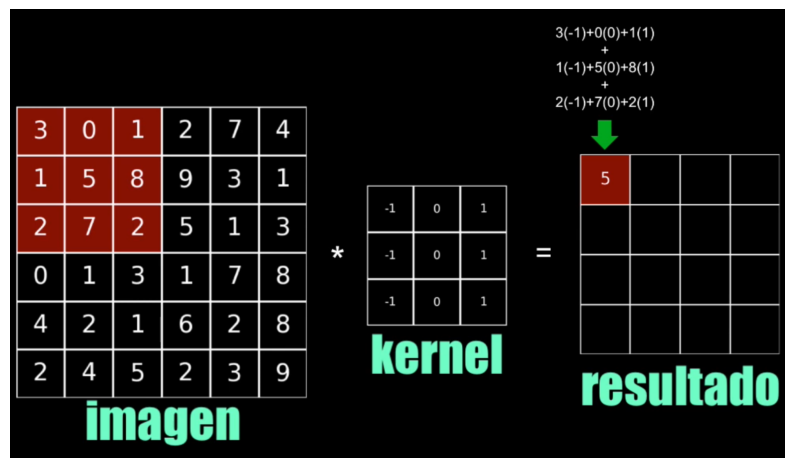

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/Conv1.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

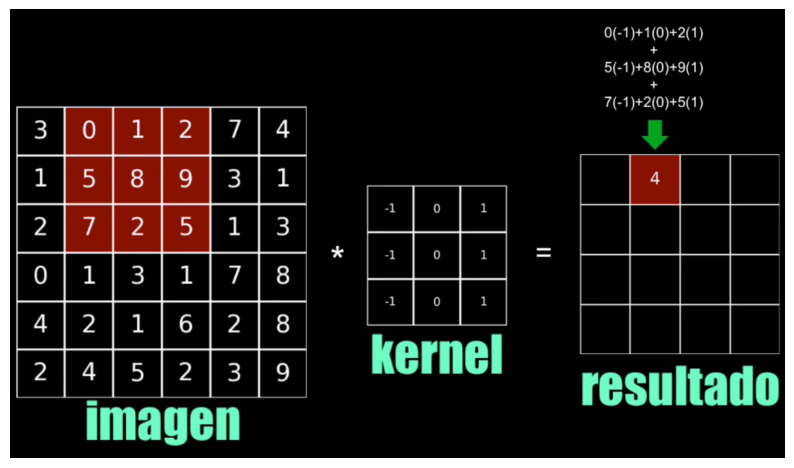

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/Conv2.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

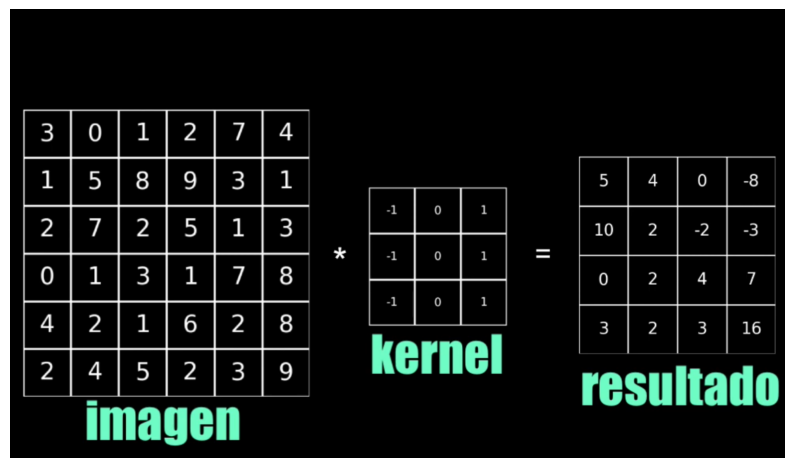

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/Conv3.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

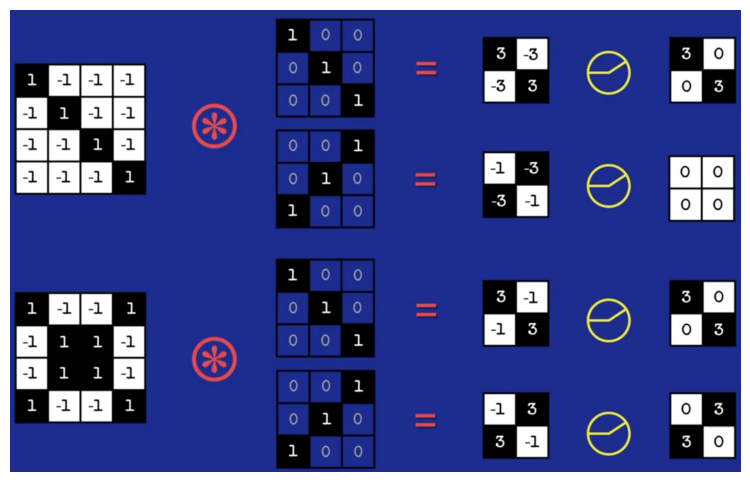

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/Conv3_1.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

Obsérvece que en el caso anterior, algunos números son negativos. Por este motivo se aplica la función "relu":
$$
f(x) = max(0,x),
$$
que transforma los valores negativos en cero.




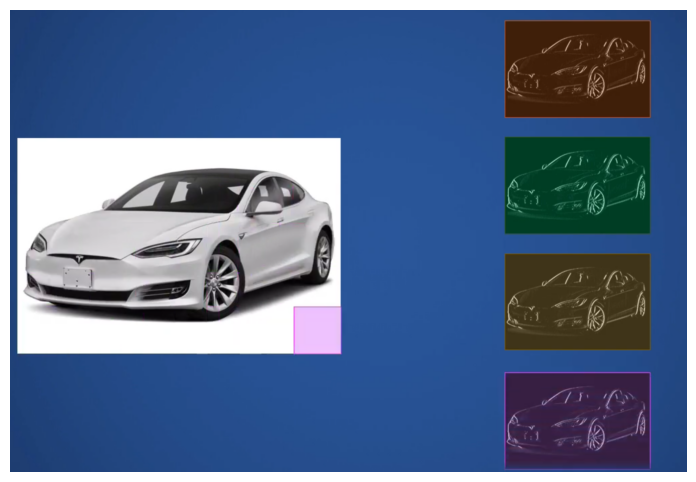

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/Conv4.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

### 2. Capa de Pooling (Reducción)
Tipos comunes:
- **Max Pooling**: Toma el valor máximo en la ventana
- **Average Pooling**: Promedia los valores


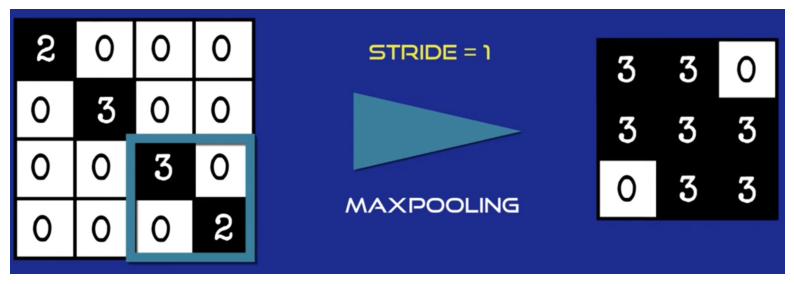

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/Conv5.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

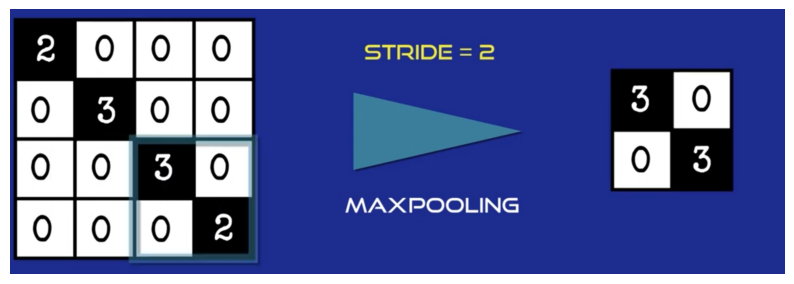

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/Conv6.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

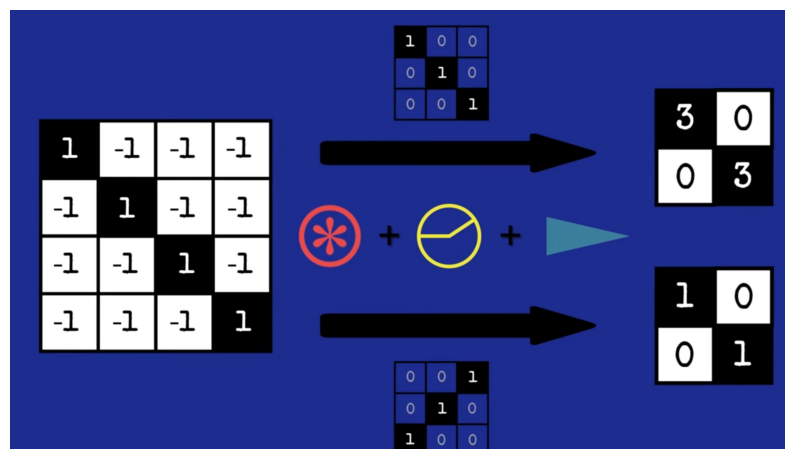

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/Conv7.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

# Aplanado (Flattering)

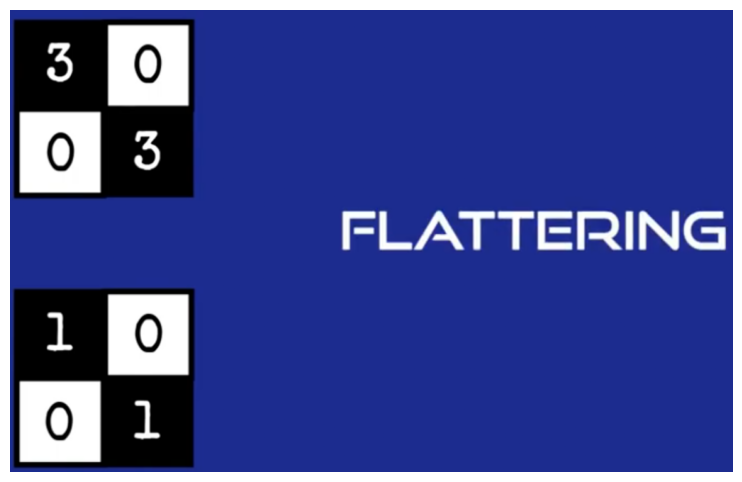

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/Conv8.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

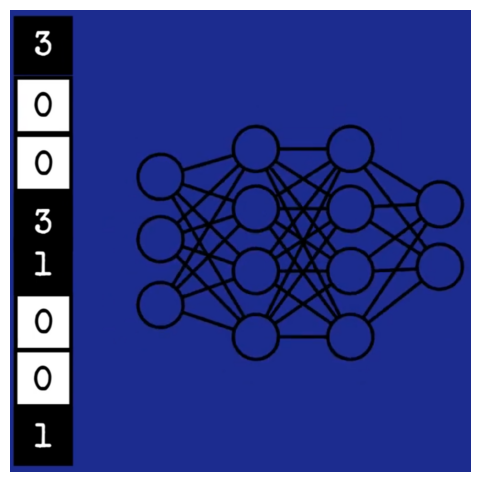

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/Conv9.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

### 4. Capas Fully Connected
- Conectan todas las neuronas entre capas
- Combinan características para la clasificación final

## Hiperparámetros clave
| Parámetro        | Valores típicos | Efecto |
|------------------|----------------|--------|
| Tamaño de filtro | 3x3, 5x5       | Detecta patrones más grandes |
| Número de filtros| 32, 64, 128    | Cantidad de características aprendidas |
| Stride           | 1, 2           | Controla el desplazamiento del filtro |
| Padding          | 'same', 'valid'| Conserva dimensiones o no |

## Ventajas sobre redes densas:
- Requieren menos parámetros
- Capturan relaciones espaciales
- Invariantes a pequeñas transformaciones
- Jerarquía automática de características

### Librerías

Verificación versión de TensorFlow

In [14]:
import random
import seaborn as sns
import os
from PIL import Image
import tensorflow as tf
##########################################################################
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
##########################################################################
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Softmax
import kagglehub
from sklearn.metrics import classification_report  #Cálculo de las métricas
print(tf.__version__)

2.18.0


Los imágenes a clasificar son tomadas de:

Julien de la Bruère-Terreault, conjunto de datos "Rock-Paper-Scissors Images", disponible bajo la licencia CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0/) en https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

In [15]:
# Clonar repositorio
!git clone https://github.com//para18952/cursoPython2025/
os.chdir("/content/cursoPython2025/Modulo2_Fundamentos_AI")



Cloning into 'cursoPython2025'...
remote: Enumerating objects: 607, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (192/192), done.
remote: Total 607 (delta 75), reused 0 (delta 0), pack-reused 414 (from 2)
Receiving objects: 100% (607/607), 49.05 MiB | 26.72 MiB/s, done.
Resolving deltas: 100% (238/238), done.


In [16]:
# Descarga el dataset "rockpaperscissors" del usuario "drgfreeman" usando Kaggle Hub
# Retorna la ruta donde se guardó el dataset descargado
path = kagglehub.dataset_download("drgfreeman/rockpaperscissors")

# Lista todos los archivos y directorios contenidos en la ruta de descarga
# os.listdir() devuelve una lista con los nombres de las entradas en el directorio
contenido = os.listdir(path)

# Notas importantes:
# 1. kagglehub.dataset_download() descarga el dataset en un formato específico de Kaggle
# 2. El dataset puede venir en diferentes estructuras:
#    - Como directorio con subdirectorios (rock/, paper/, scissors/)
#    - Como archivo comprimido (dataset.zip)
# 3. Si os.listdir() falla, puede ser porque:
#    - La descarga no se completó correctamente
#    - El path retornado no es un directorio directamente accesible
#    - Se necesitan permisos adicionales



In [17]:
# Imprime el número de archivos en el directorio 'rock'
print(len(os.listdir(path + "/" + "rock")))  # Muestra cuántas imágenes de 'rock' hay disponibles

# Imprime el número de archivos en el directorio 'paper'
print(len(os.listdir(path + "/" + "paper")))  # Muestra cuántas imágenes de 'paper' hay disponibles

# Lista TODOS los archivos en el directorio 'scissors' (puede ser mucha salida)
print(os.listdir(path + "/" + "scissors"))  # Muestra los nombres de todos los archivos de 'scissors'

726
712
['TfQG2fJYyDv8Ic8P.png', 'EesxTpYzhZoMVlH8.png', '8Gew5erdZ7A4K3gI.png', 'RydyYWgvhLQPwEaw.png', '256MrhkDete6aQhP.png', 'o1cPo5Z2YLfTz2vJ.png', 'jWUoY57nkFKUUdD5.png', 'cDveaur4dR2ZCCo8.png', 'JSDICtLrQIEXhPy5.png', 'eqJEQe8W9FP4TOck.png', 'j1EfA5DclfCJdzLb.png', 'FoYWUBXBw6qO7y0f.png', 'cPuxKnJCdcTotM5k.png', '7vtC68OSHd1FZJvN.png', 'OA0s5AsfJEm96cxd.png', 'aMAVOdimraDSK6P1.png', 'gzRmdTIFRzV34Vjl.png', 'jMVjrTQfvJ0xLTOt.png', 'zdo3LHesq3aHmu1f.png', 'lhD4U5er2UL6nfAH.png', '8Q1PAZsxpLf5FAo6.png', 'kC1AoCFrvaMKlTDk.png', 'NR48QMe5e1gskpA9.png', '2C9FEbBklwcVhF3W.png', 'mmLhBFvXWgD957XY.png', 'QGySPOxev60wlq1M.png', 'vMAludIRGF14FuGn.png', 'WUEe440w137BuSEE.png', 'pZ9zE5ahoKZhIZqm.png', '3n4i3lKB3nZOpDVv.png', 'bn7yju6XvU87slzH.png', '2ZPcSpOm7SEfQYwg.png', 'KSNET1XTWbrg5Rcz.png', 'oYB271o4Oo5uFHpW.png', '55yz6JI9f5DTbq9D.png', '5DdrFpDc8YbG1oCo.png', '64ktckSF0c26K6AY.png', 'oxyMOfWC1lQU6dRf.png', '5mipmm4t8RM5o0tW.png', 'wT8z7icdMJt816Ix.png', 'UPH9bl4Vrq4Gwp3K.png', 'FCsZ8x

### Cargar Imágenes del repositorio:

Se considera que las imágenes están organizadas por categoría, almacenadas en directorios separados llamados *rock*, *paper* y *scissors*. Dentro de cada uno, los archivos de imagen están nombrados secuencialmente desde 0.png hasta 699.png, representando su número correspondiente.


In [18]:
# Descripción de clases y su identificador
descripcion = ("paper", "rock", "scissors")
clases = {"paper": 0, "rock": 1, "scissors": 2}

# Número de imágenes de cada clase a considerar (máximo 700)
num_img_clase = 700

# Porcentajes de división
train_ratio = 0.7
test_ratio = 0.3

# Calcular número de imágenes para entrenamiento y prueba
num_entrena = round(num_img_clase * train_ratio)
num_prueba = round(num_img_clase * test_ratio)

# Inicializar arrays para almacenar los datos
import numpy as np
imagenes_entrena = np.empty((num_entrena * len(clases), 200, 300, 3), dtype="uint8")
clases_entrena = np.empty(num_entrena * len(clases), dtype="uint8")

imagenes_prueba = np.empty((num_prueba * len(clases), 200, 300, 3), dtype="uint8")
clases_prueba = np.empty(num_prueba * len(clases), dtype="uint8")

# Para cada clase, seleccionar 700 imágenes aleatorias y dividirlas en train/test
for clase in clases:
    # Obtener lista de todos los archivos en el directorio de la clase
    archivos = os.listdir(path + "/" + clase)

    # Seleccionar aleatoriamente 700 imágenes (sin repetición)
    archivos_seleccionados = random.sample(archivos, num_img_clase)

    # Dividir en conjuntos de entrenamiento y prueba
    archivos_train = archivos_seleccionados[:num_entrena]
    archivos_test = archivos_seleccionados[num_entrena:num_img_clase]

    # Cargar imágenes de entrenamiento
    for i, archivo in enumerate(archivos_train):
        imagen = Image.open(os.path.join(path, clase, archivo))
        indice = i + clases[clase] * num_entrena
        imagenes_entrena[indice] = np.array(imagen)
        clases_entrena[indice] = clases[clase]

    # Cargar imágenes de prueba
    for i, archivo in enumerate(archivos_test):
        imagen = Image.open(os.path.join(path, clase, archivo))
        indice = i + clases[clase] * num_prueba
        imagenes_prueba[indice] = np.array(imagen)
        clases_prueba[indice] = clases[clase]

# Verificación
print(f"Total imágenes entrenamiento: {len(imagenes_entrena)}")
print(f"Total imágenes prueba: {len(imagenes_prueba)}")
print("¡Datos cargados exitosamente!")

Total imágenes entrenamiento: 1470
Total imágenes prueba: 630
¡Datos cargados exitosamente!


# Visualización de imágenes aleatorias

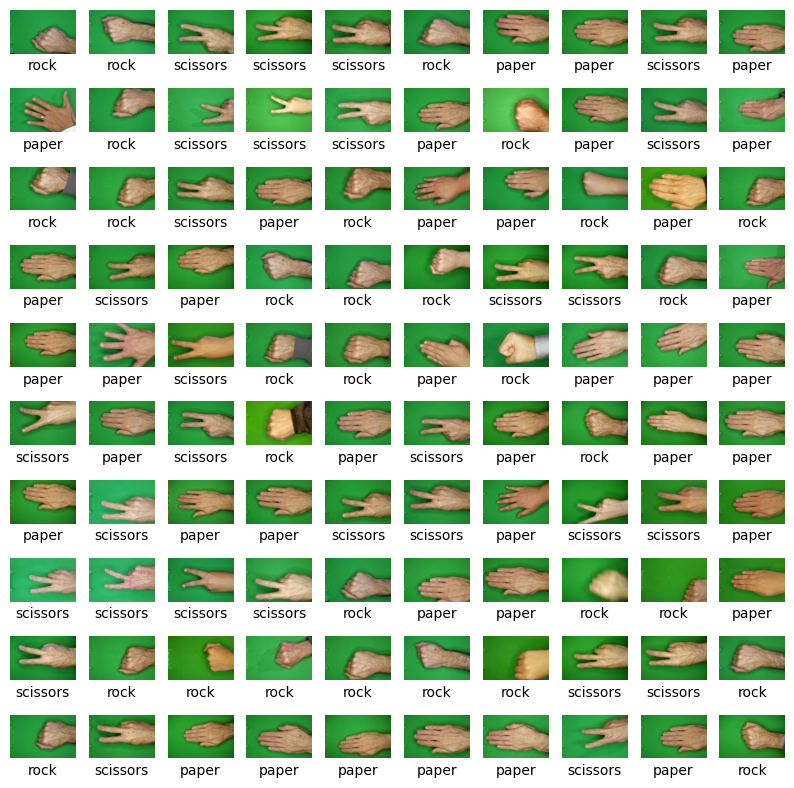

In [19]:
# Crear una figura de matplotlib con tamaño 10x10 pulgadas
plt.figure(figsize=(10, 10))

# Mostrar 100 imágenes en una cuadrícula de 10x10
for i in range(100):
    # Crear subplot en posición i+1 (comienza en 1, no en 0)
    plt.subplot(10, 10, i + 1)

    # Seleccionar un índice aleatorio dentro del rango de imágenes de entrenamiento
    indice = random.randint(0, num_entrena*len(clases) - 1)

    # Mostrar la imagen correspondiente al índice seleccionado
    # Se usa cmap="gray" para mostrar en escala de grises (aunque las imágenes son RGB)
    plt.imshow(imagenes_entrena[indice], cmap="gray")

    # Añadir etiqueta (clase) como texto en la parte inferior
    plt.xlabel(descripcion[clases_entrena[indice]])

    # Configuraciones de estilo para mejorar la visualización:
    plt.grid(False)    # Desactivar cuadrícula
    plt.box(False)     # Desactivar borde alrededor de la imagen
    plt.xticks([])     # Eliminar marcas del eje X
    plt.yticks([])     # Eliminar marcas del eje Y

# Mostrar la figura completa con todas las sub-imágenes
plt.show()

## Visualización de una sola imagen en tamaño grande

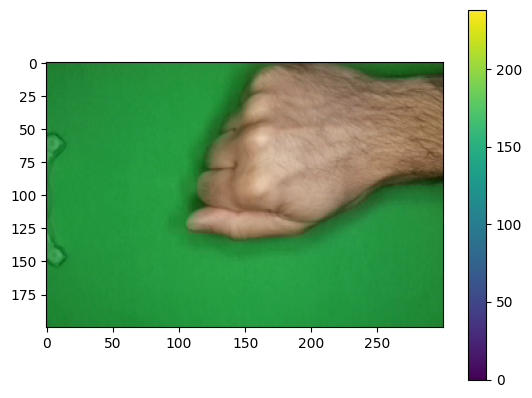

In [20]:
num_aleatorio = random.randint(0, 700)
# Crear una nueva figura de matplotlib (tamaño por defecto)
plt.figure()

# Mostrar la imagen en escala de grises
plt.imshow(imagenes_entrena[num_aleatorio])


# Añadir una barra de color (colorbar) que indica la escala de valores de píxeles
plt.colorbar()

# Mostrar la figura
plt.show()


In [21]:
### Escalar los píxeles de las imágenes del rango [0, 255] al rango [0, 1]
imagenes_entrena = imagenes_entrena / 255.0
imagenes_prueba = imagenes_prueba / 255.0


# Modelo CNN para Clasificación de Imágenes

In [22]:
# Definición del modelo secuencial (capas apiladas linealmente)
model = Sequential()

# 32 filtros
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 300, 3)))
# crea una capa de MaxPooling que toma el valor máximo de una ventana de 2x2 a medida que se desliza sobre la entrada.
# Esto ayuda a reducir las dimensiones espaciales de los mapas de características, haciendo que el modelo sea más robusto a pequeñas variaciones en la entrada y reduciendo el número de parámetros.
model.add(MaxPooling2D((2, 2)))

# añade capa convolucional
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# añade capa convolucional
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# aplanar
model.add(Flatten())

# capa oculta
model.add(Dense(512, activation='relu'))

# capa de salida
model.add(Dense(3, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Cofigurarción del Modelo para Entrenamiento

In [23]:
#Compilar
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

 #model.compile(optimizer='adam',              loss='sparse_categorical_crossentropy',              metrics=['accuracy'])

# Entrenamiento de la CNN

In [24]:
# Antes de ejecutar esto hay que cambiar el entorno de ejecución
# Entrena la red neuronal con las imágenes y clases del conjunto de entrenamiento.
history = model.fit(imagenes_entrena, clases_entrena, epochs=10, validation_data=(imagenes_prueba, clases_prueba))

# El proceso se repite durante 10 épocas, es decir, el modelo verá todo el conjunto de datos 10 veces.




Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 301ms/step - accuracy: 0.4078 - loss: 1.0815 - val_accuracy: 0.3730 - val_loss: 1.0010
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.5905 - loss: 0.8965 - val_accuracy: 0.7778 - val_loss: 0.6855
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.7741 - loss: 0.6232 - val_accuracy: 0.7222 - val_loss: 0.6454
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.8162 - loss: 0.5117 - val_accuracy: 0.8111 - val_loss: 0.5223
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.8660 - loss: 0.3812 - val_accuracy: 0.8619 - val_loss: 0.4240
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.8926 - loss: 0.3117 - val_accuracy: 0.9175 - val_loss: 0.2748
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.8697 - loss: 0.3459 - val_accuracy: 0.9222 - val_loss: 0.2609
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9321 - loss: 0.1975 - val_accuracy: 0.9175 -

# Evaluación del modelo

In [25]:
# Evalúa el rendimiento del modelo sobre el conjunto de prueba (imágenes y etiquetas reales)
# Retorna la pérdida (loss) y la exactitud (accuracy)
loss, acc = model.evaluate(imagenes_prueba, clases_prueba)

# Imprimir loss y precision
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9042 - loss: 0.3390
Loss: 0.18421292304992676
Accuracy: 0.9444444179534912


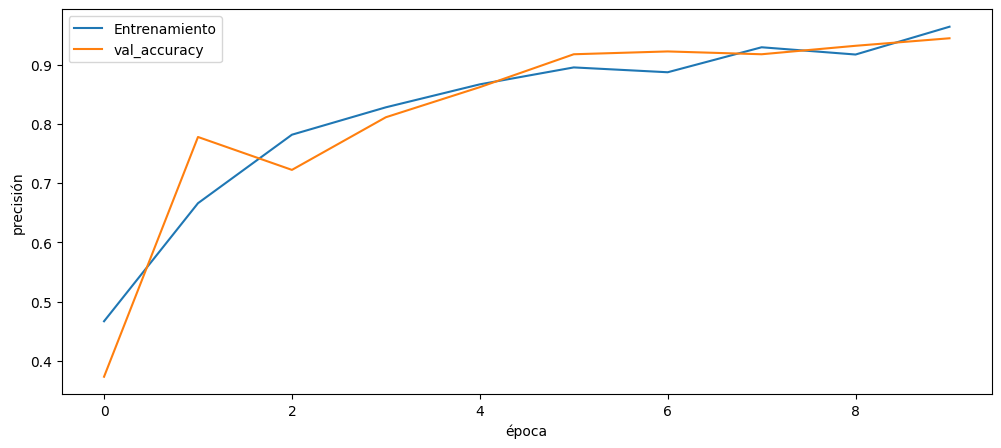

In [30]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('época')
plt.ylabel('precisión')
plt.legend()
plt.show()

# Clasificación de las imágenes del conjunto de entrenamiento con la CNN entrenada

In [31]:
# Genera predicciones del modelo para las imágenes del conjunto de pruentrenamiento
# El resultado será un array con las probabilidades asignadas a cada clase para cada imagen
entrenamiento_predicciones = model.predict(imagenes_entrena)


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step


In [32]:
mayor_probabilidad = np.argmax(entrenamiento_predicciones, axis=1)


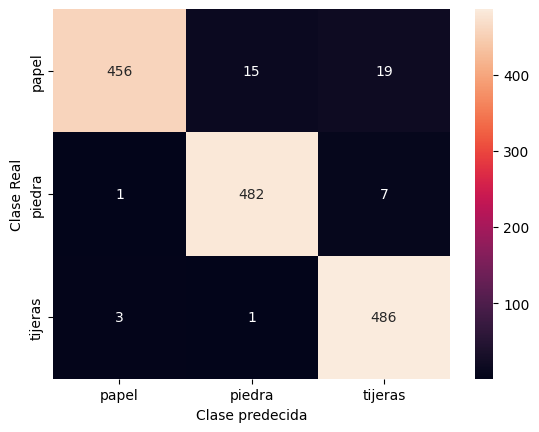

              precision    recall  f1-score   support

       paper       0.99      0.93      0.96       490
        rock       0.97      0.98      0.98       490
    scissors       0.95      0.99      0.97       490

    accuracy                           0.97      1470
   macro avg       0.97      0.97      0.97      1470
weighted avg       0.97      0.97      0.97      1470



In [47]:
# Mostrar la matriz de confusión
matriz_entrenamiento = confusion_matrix(clases_entrena, mayor_probabilidad)
etiquetas = ["papel", "piedra", "tijeras"]
sns.heatmap(matriz_entrenamiento, annot=True, fmt='d', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Clase predecida')
plt.ylabel('Clase Real')
plt.show()

print(classification_report(clases_entrena, mayor_probabilidad, target_names=descripcion))
#

# Clasificación de las Imágenes del conjunto de prueba con la CNN entrenada

In [49]:
test_predicciones = model.predict(imagenes_prueba)
test_mayor_probabilidad = np.argmax(test_predicciones, axis=1)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


# Salida de la CNN para cada imagen del conjunto de prueba

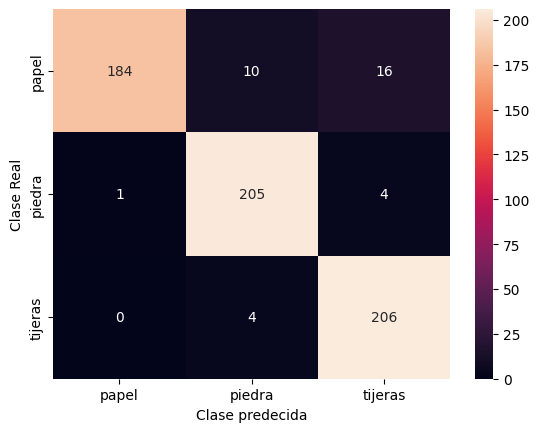

              precision    recall  f1-score   support

       paper       0.99      0.88      0.93       210
        rock       0.94      0.98      0.96       210
    scissors       0.91      0.98      0.94       210

    accuracy                           0.94       630
   macro avg       0.95      0.94      0.94       630
weighted avg       0.95      0.94      0.94       630



In [51]:
# Mostrar la matriz de confusión
matriz_prueba = confusion_matrix(clases_prueba, test_mayor_probabilidad)
etiquetas = ["papel", "piedra", "tijeras"]
sns.heatmap(matriz_prueba, annot=True, fmt='d', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Clase predecida')
plt.ylabel('Clase Real')
plt.show()

print(classification_report(clases_prueba, test_mayor_probabilidad, target_names=descripcion))
#

# Resultado de la evaluación: matriz de confusión:

# Actividad

Dataset: CIFAR-10
CIFAR-10 es un conjunto de datos clásico que contiene 60,000 imágenes a color de 32x32 píxeles, divididas en 10 clases (aviones, automóviles, pájaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones). Cada clase tiene 6,000 imágenes.


Realizar la calsificación de las 10 clases utilizando CNN

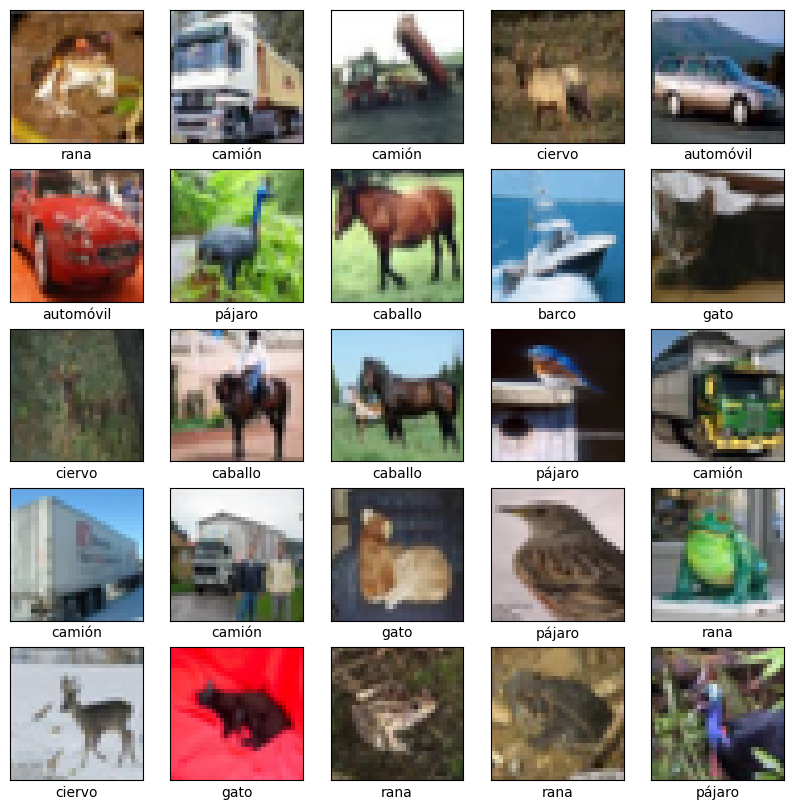

In [86]:
# Cargar el dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalizar los valores de píxeles al rango [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Nombres de las clases
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
               'perro', 'rana', 'caballo', 'barco', 'camión']

clases = {"avión": 0, "automóvil": 1, "pájaro": 2, "gato": 3, "ciervo": 4,
               "perro": 5, "rana": 6, "caballo": 7, "barco": 8, "camión": 9}


# Visualizar algunas imágenes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [91]:
# Definición del modelo secuencial (capas apiladas linealmente)
model = Sequential()

# 32 filtros
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# crea una capa de MaxPooling que toma el valor máximo de una ventana de 2x2 a medida que se desliza sobre la entrada.
# Esto ayuda a reducir las dimensiones espaciales de los mapas de características, haciendo que el modelo sea más robusto a pequeñas variaciones en la entrada y reduciendo el número de parámetros.
model.add(MaxPooling2D((2, 2)))

# añade capa convolucional
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# añade capa convolucional
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# aplanar
model.add(Flatten())

# capa oculta
model.add(Dense(512, activation='relu'))

# capa de salida
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
#Compilar
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [102]:
# Antes de ejecutar esto hay que cambiar el entorno de ejecución
# Entrena la red neuronal con las imágenes y clases del conjunto de entrenamiento.
hsty = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6646 - loss: 0.9680 - val_accuracy: 0.6324 - val_loss: 1.0739
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6776 - loss: 0.9330 - val_accuracy: 0.6576 - val_loss: 0.9976
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6930 - loss: 0.8841 - val_accuracy: 0.6469 - val_loss: 1.0492
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7093 - loss: 0.8463 - val_accuracy: 0.6671 - val_loss: 0.9676
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7173 - loss: 0.8119 - val_accuracy: 0.6512 - val_loss: 1.0130
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7291 - loss: 0.7796 - val_accuracy: 0.6425 - val_loss: 1.0392
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7418 - loss: 0.7445 - val_accuracy: 0.6652 - val_loss: 0.9837
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7565 - loss: 0.7115

In [104]:
# Evalúa el rendimiento del modelo sobre el conjunto de prueba (imágenes y etiquetas reales)
# Retorna la pérdida (loss) y la exactitud (accuracy)
loss, acc = model.evaluate(train_images, train_labels)

# Imprimir loss y precision
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9527 - loss: 0.1398
Loss: 0.1413886994123459
Accuracy: 0.9525399804115295


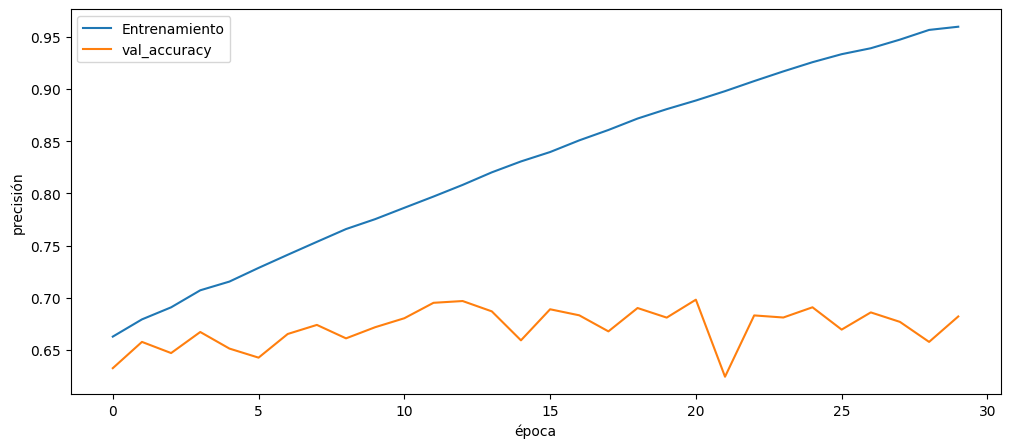

In [105]:
plt.figure(figsize=(12, 5))
plt.plot(hsty.history['accuracy'], label='Entrenamiento')
plt.plot(hsty.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('época')
plt.ylabel('precisión')
plt.legend()
plt.show()

In [106]:
# Genera predicciones del modelo para las imágenes del conjunto de pruentrenamiento
# El resultado será un array con las probabilidades asignadas a cada clase para cada imagen
entrenamiento_predicciones = model.predict(train_images)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [107]:
mayor_probabilidad = np.argmax(entrenamiento_predicciones, axis=1)
print(mayor_probabilidad)

[6 9 9 ... 9 1 1]


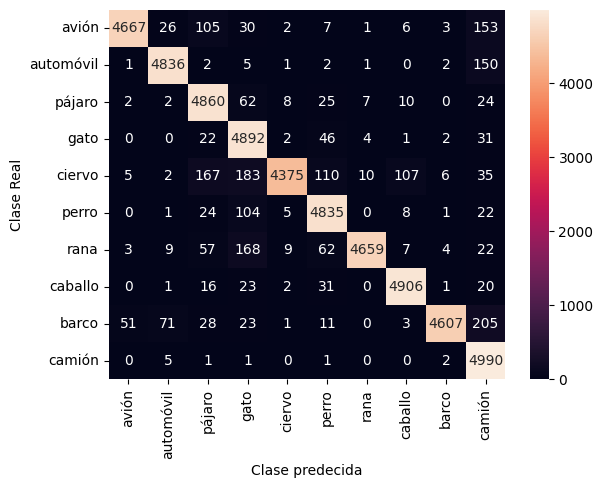

In [108]:
# Mostrar la matriz de confusión
matriz_entrenamiento = confusion_matrix(train_labels, mayor_probabilidad)
sns.heatmap(matriz_entrenamiento, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Clase predecida')
plt.ylabel('Clase Real')
plt.show()

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6484 - loss: 1.3878 - val_accuracy: 0.7528 - val_loss: 0.7281
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7631 - loss: 0.7032 - val_accuracy: 0.8164 - val_loss: 0.5476
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8108 - loss: 0.5532 - val_accuracy: 0.8546 - val_loss: 0.4484
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8551 - loss: 0.4431 - val_accuracy: 0.9025 - val_loss: 0.3343
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8959 - loss: 0.3471 - val_accuracy: 0.9146 - val_loss: 0.2909
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9164 - loss: 0.2840 - val_accuracy: 0.9406 - val_loss: 0.2261
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9408 - loss: 0.2254 - val_accuracy: 0.9662 - val_loss: 0.1691
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9629 - loss: 0.1715 - val_accuracy: 0.

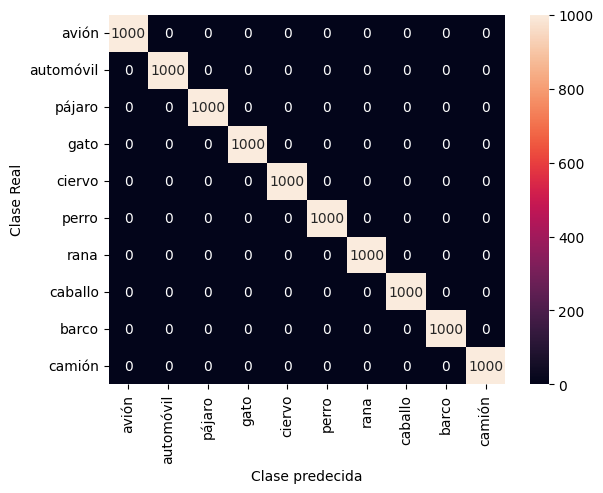

In [110]:
# CON LA PARTE DE TEST
hsty = model.fit(test_images, test_labels, epochs=30, validation_data=(test_images, test_labels))

# Evalúa el rendimiento del modelo sobre el conjunto de prueba (imágenes y etiquetas reales)
# Retorna la pérdida (loss) y la exactitud (accuracy)
loss, acc = model.evaluate(test_images, test_labels)

# Imprimir loss y precision
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")

TEST_predicciones = model.predict(test_images)
test_mayor_probabilidad = np.argmax(TEST_predicciones, axis=1)

#Mostrar la matriz de confusión
matriz_prueba = confusion_matrix(test_labels, test_mayor_probabilidad)
sns.heatmap(matriz_prueba, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Clase predecida')
plt.ylabel('Clase Real')
plt.show()